<h2>Imports, Custom dataset generate, Train-test data split, Data Standardization</h2>

In [31]:
# importing required libraries (will import sklearn lib too as we will use it to compute logistic regression results and compare the results with the custom Logistic Regression results)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [4]:
# creating binary classification dataset
# make_classification is used to create custom dataset 
x, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

# shapes/sizes of the x and y
print(x.shape, y.shape)

(50000, 15) (50000,)


In [5]:
# splitting the data into train and test data (75% train and 25% test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=15)

In [6]:
# standardizing the data (scaling the data to mean 0 and variance 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h2>Logistic Regression Custom Implementation</h2>

* Initialize the weight_vector and intercept term to zeros.

* Create a loss function

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:

    - for each data point in train:

        - calculate the gradient of loss function w.r.t each weight in weight vector

            $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

        - Calculate the gradient of the intercept

           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

        - Update weights and intercept<br>
            $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

            $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $
    - calculate the log loss for train and test with the updated weights


<font color='cyan'>Initialize weights </font>

In [9]:
# initializing weights vector 'w' and intercept term 'b' to zero
# dim is the number of features/columns of the train dataset 'X_train'
def initialize_weights(dim):
  w = np.zeros_like(dim)
  b = 0
  return w,b

In [10]:
dim=X_train[0]
w,b = initialize_weights(dim)

# printing the weight vector(initialized as array of zero values)
print('w =',(w)) 
# printing the intercept term(b)
print('b =',str(b)) 

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


<font color='cyan'>Sigmoid Computation </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [11]:
# return σ(z) value according to its formula which is σ(z)=1/(1+e⁻ᶻ)
def sigmoid(z):
  return 1/(1+np.exp(-z))

<font color='cyan'>Log loss Computation </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [12]:
# passing true value of y and predicted value of y as arguments to the function
def logloss(y_true,y_pred):  
  # initializing summation to zero before incrementing it in the for loop
  summation = 0

  for i in range(len(y_true)):
    # calculating loss for all the n points(incrementing summation with loss value)
    summation += (y_true[i] * np.log10(y_pred[i])) + ((1 - y_true[i]) * np.log10(1 - y_pred[i]))
  
  # multiplying obtained summation value with -1/n(n points of data)
  loss = -1 * (1/len(y_true)) * summation
  
  return loss

<font color='cyan'>Gradient Computation w.r.t 'w'</font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [13]:
# we have already calculated sigmoid(element) value in sigmoid(z) function
def gradient_dw(x,y,w,b,alpha,N):
  dw = x * (y - sigmoid(np.dot(w,x) + b)) - ((alpha/N) * w)
  return dw

<font color='cyan'>Gradient Computation w.r.t 'b'</font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [14]:
def gradient_db(x,y,w,b):
   db = y - sigmoid(np.dot(w,x) + b)
   return db

<font color='cyan'>Implementing Logistic Regression</font>

In [15]:
# epochs is the number of times entire training dataset is passed in the classifier/regressor
# alpha is the L2 regularizer
# eta is the learning rate

def custom_lr(X_train,y_train,X_test,y_test,epochs,alpha,eta):
  # empty lists to store training loss and testing loss
  train_loss, test_loss = [], []

  # initializing w and b to zero values
  w,b = initialize_weights(X_train[0])

  for i in range(epochs):
    # empty lists to store training and testing predictions(y_pred)
    train_prediction, test_prediction = [], []

    for j in range(len(X_train)):
      # computing gradients dw and db(w.r.to w and b) for all train data points
      dw = gradient_dw(X_train[j], y_train[j], w, b, alpha, len(X_train))
      db = gradient_db(X_train[j], y_train[j], w, b)

      # increment w and b (updated the weights and intercept)
      w += (eta * dw)
      b += (eta * db)

    for train_datapoint in range(len(X_train)):
      # appending the predictions done on train data in the list train_prediction
      train_prediction.append(sigmoid(np.dot(w, X_train[train_datapoint]) + b))
      
    # computing logloss for train data
    loss_for_train = logloss(y_train, train_prediction)

    # storing train logloss of all epochs
    train_loss.append(loss_for_train) 

    for test_datapoint in range(len(X_test)):
      # appending the predictions done on test data in the list test_prediction
      test_prediction.append(sigmoid(np.dot(w, X_test[test_datapoint]) + b))
      
    # computing logloss for test data
    loss_for_test = logloss(y_test, test_prediction)
    
    # storing test logloss of all epochs
    test_loss.append(loss_for_test)
    
  # return value of weights,intercept,train loss,test loss
  return w,b,train_loss,test_loss 

In [16]:
# hardcoding alpha (L2 regularizer's) value, learning rate value, number of passes of entire train dataset
alpha=0.0001 
eta=0.0001
epochs=15

# calling the above defined function on these values
w,b,log_loss_train,log_loss_test=custom_lr(X_train,y_train,X_test,y_test,epochs,alpha,eta)

In [17]:
# custom implemented Logistic Regression's weights and intercept value
print(w)
print(b)

[-0.9048262   0.64656179 -0.07822054  0.63777662 -0.3907577   0.9442469
 -0.90299306 -0.07160359  0.41570122  0.42360749  0.25179668  0.05395901
 -0.08823163  0.54374451  0.06700376]
-1.3119223645129905


<h2>Logistic Regression SKLearn Implementation</h2>

In [24]:
# loss = 'log_loss' for Logistic Regression
# penalty = 'l2' for L2 regularization 
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log_loss', random_state=15, penalty='l2', tol=1e-3, learning_rate='constant')
clf

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log_loss',
              random_state=15)

In [25]:
# training the model
clf.fit(X=X_train, y=y_train)

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log_loss',
              random_state=15)

In [28]:
#clf.coef_ will return the weights
#clf.intercept_ will return the intercept term
clf.coef_, clf.intercept_

(array([[-0.89007184,  0.63162363, -0.07594145,  0.63107107, -0.38434375,
          0.93235243, -0.89573521, -0.07340522,  0.40591417,  0.4199991 ,
          0.24722143,  0.05046199, -0.08877987,  0.54081652,  0.06643888]]),
 array([-1.30580538]))

<h2>Comparing the results of both the implementations</h2>

Difference between the SKLearn's implemented weights and custom implemented weights should be as low as possible i.e. in terms of 10^-3. It shows, our custom implementation is correct.

In [29]:
# subtracting optimal weights and intercepts of scikit learn's LR and our custom implemented LR
w-clf.coef_, b-clf.intercept_

(array([[-0.01475437,  0.01493816, -0.00227909,  0.00670554, -0.00641395,
          0.01189447, -0.00725785,  0.00180162,  0.00978705,  0.00360839,
          0.00457525,  0.00349702,  0.00054823,  0.00292799,  0.00056488]]),
 array([-0.00611698]))

**Observation** - <br>


*   The difference between the optimal weights(w) of scikitlearn's Logistic Regression and custom implemented Logistic Regression is in terms of 10⁻³ (for almost weights).
*   The difference between the intercept of scikitlearn's LR and custom implemented LR is in terms of 10⁻³.



<h2>Train-Test Loss Plot and Accuracy of Train-Test Data</h2>

<font color='cyan'>Plotting Train-Test Loss</font>

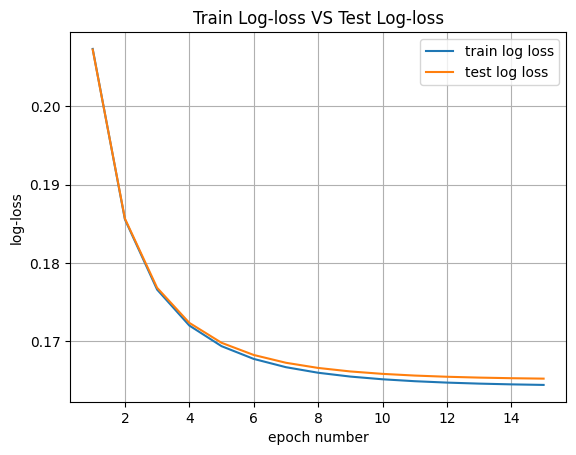

In [32]:
# curve for 15 epoch values
x = [i for i in range(1,16,1)] 

# logloss curves for train and test data 
plt.plot(x, log_loss_train, label='train log loss') 
plt.plot(x, log_loss_test, label='test log loss')

plt.xlabel('epoch number')
plt.ylabel('log-loss')
plt.title('Train Log-loss VS Test Log-loss')
plt.grid()
plt.legend()
plt.show()

**Observaion** - <br>
*   The loss curves (train and test both) drastically falls till 4 epochs, then gradually decreases till 15 epochs.

<font color='cyan'>Computing Accuracy of Train and Test Data</font>

In [33]:
# function defined to calculate the prediction value(y_hat) of train and test data

def pred(w,b, X):
    # number of train/test data points
    N = len(X)

    # empty list to store predicted points
    predict = [] 

    for i in range(N):
        # formula for z(z=w^Tx +b) for all the points
        z=np.dot(w,X[i])+b

        # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
        if sigmoid(z) >= 0.5: 
            # storing positively classified points in the list
            predict.append(1) 

        else:
            # storing negatively classified points in the list
            predict.append(0) 

    # return predicted points array
    return np.array(predict)


print('Accuracy score for Train data is - ')
# accuracy for train data 
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))

print('Accuracy score for Test data is - ')
# accuracy for test data
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test)) 

Accuracy score for Train data is - 
0.9506666666666667
Accuracy score for Test data is - 
0.94768
